In [6]:
%matplotlib inline

In [7]:
import numpy as np
import math
import pygame
import matplotlib.pyplot as plt
from body import Body
from gravity_animation import animation

# <center>Project: Non-simultaneous gravitational interaction<center> 
## <center>Abstract<center>
According to modern physical theories, the interaction between physical objects such as bodies, elementary particles, etc., is governed by four fundamental types of interactions: electromagnetic, strong nuclear, weak nuclear, and gravitational. These interactions are described as physical fields and are mediated by the exchange of special (virtual) particles. Historically, the first sufficiently well-studied and systematic interaction was gravitational, and Sir Isaac Newton deserves credit for that. The formula he derived provides a description of the interaction between two bodies with certain masses and at a specific distance from each other. However, this formula implicitly includes a very important assumption: gravitational interaction occurs instantaneously.

In the late 19th century, Michelson and Morley experimentally established that the speed of light is the same regardless of the direction in which it moves. At the beginning of the 20th century, this unexpected property of light formed the basis of Einstein's Special Theory of Relativity as one of its two fundamental postulates: the speed of light in a vacuum is a constant and has the same value in all inertial reference frames. In modern understanding, the speed of light is the ultimate limit of the speed at which a physical object could move (more precisely, a physical object whose rest mass is zero). It is not possible to transmit any information at a faster speed. This automatically means that the four fundamental interactions should also occur with a finite speed: the time interval between the emission of the virtual particle and its absorption by another particle must be nonzero. Although no particle carrying the gravitational interaction has been discovered so far, it is also expected to occur with a time delay.

On September 14, 2015, the Laser Interferometer Gravitational-Wave Observatory (LIGO) experiment detected gravitational waves, as predicted by the General Theory of Relativity in 1916. The object GW150914, which was detected, represents a system of two black holes located at a distance of approximately 1.3 billion light-years from Earth. The merging of the two black holes causes deformations in the geometry of spacetime, i.e., gravitational waves, which travel through the cosmic space and reach Earth after 1.3 billion years. The LIGO experiment confirms the finite speed of propagation of gravitational interaction.

This project aims to accomplish the following tasks:
 *  Тo calculate the motion of a system of two or more bodies that interact gravitationally in both the simultaneous and non-simultaneous interaction modes, and to depict their motion in animation;
 *  To compare the two modes of interaction and to demonstrate the difference between them (if such a difference exists).
    
## <center>Part One: Physical Explanation<center>

Currently, there are two theories of gravity that have been sufficiently scientifically tested: Newton's theory of gravity (NTG) and Einstein's General Theory of Relativity (GTR). Although GTR is the more accurate theory, NTG remains sufficiently accurate for calculating gravitational interactions in physical systems involving moving objects with relatively low speeds and weak gravitational fields. There is also another significant difference between the two theories - NTG considers space, time, and matter as independent physical quantities and the motions of objects under gravitational forces as non-inertial. In contrast, GTR views space, time, and matter as deeply interconnected and mutually influencing physical quantities, and the motion of objects in gravitational fields as inertial. In GTR, gravity is not regarded as a force but as the curvature of the geometry of spacetime caused by the presence of massive bodies in a given volume of space. Since there is no force acting, according to the First Law of Mechanics, the motion of an object should be inertial. The deviation of the object's trajectory is a result of it following a so-called geodesic curve - the shortest path between two points in space.

In this project, gravitational interactions will be calculated from the Newtonian perspective using the well-known formula for gravitational interaction between two bodies:
    
    
$$\vec{F} = G\frac{m_1m_2}{r^2},\quad\quad\quad\quad(1)$$       
    
    
where:
 * F is the force of attraction between the two interacting objects,
 * G is the gravitational constant, approximately equal to 6.675×10⁻¹¹ m³/(kg·s²),
 * m1 is the mass of one object,
 * m2 is the mass of the other object,
 * r is the distance between the centers of mass of the two objects. 
 

Let's now replace $m_1$ with M and $m_2$ with m:
    
$$\vec{F} = G\frac{Mm}{r^2},\quad\quad\quad\quad(2)$$
    
where $M$ is the mass of the body creating the gravitational field, and $m$ is the mass of the body located in that gravitational field and experiencing the acceleration created by the field at that point. 
    
**Important clarification!!! In this project, the capital $M$ does not imply that the mass $M$ is greater than the lowercase $m$. It signifies that the mass $M$ is responsible for creating the gravitational field in which the body with mass $m$ is located. This principle underlies the fundamental concept in this project and will be further explained below.**
    
When an object is located in the gravitational field of another object, the force acting on it is given by another well-known formula of Newton:
    
$$\vec{F} = m\vec{a},\quad\quad\quad\quad(3)$$
    
In this case, we need to replace the acceleration $a$ with the gravitational acceleration $g$.
    
$$\vec{F} = m\vec{g},\quad\quad\quad\quad(4)$$

Since the forces are equal, we can substitute (4) into (2) and obtain:
    
$$m\vec{g} = G\frac{Mm}{r^2},\quad\quad\quad\quad(5)$$ 
    
We simplify both sides of the equation by dividing by $m$ and obtain the formula for the magnitude and direction of the gravitational acceleration generated by a body with mass M at a distance $r$:
    
$$\vec{g} = G\frac{M}{r^2},\quad\quad\quad\quad(6)$$  
    
From the formula, it can be seen that the magnitude of the acceleration does not depend on the mass of the attracted body (in this case $m$).
    
The same logic should be valid regarding the first body with mass $M$, which is located in the gravitational field of $m$. It experiences an acceleration created by the gravitational field of $m$, and its magnitude and direction will be:
    
$$\vec{g} = G\frac{m}{r^2},\quad\quad\quad\quad(7)$$
    
Here, the fundamental concept in this project needs to be introduced - the gravitational signal. The "gravitational signal" is not the hypothetical particle carrying the gravitational interaction - the graviton. The "gravitational signal" is simply a term that describes the transmission of specific information through space (and time). More specifically, the information it carries pertains to two things - the current location of the body at the time it is emitted and the mass of the body from which it is emitted. When body A "absorbs" a gravitational signal emitted by body B, it simply means that body A is subjected to an acceleration, with a magnitude and direction contained as information within the gravitational signal. 
    

The next key concept in this project is that once emitted, the signal is **independent** of its source and propagates spherically and uniformly in all directions. The reverse would not be possible because the "gravitational signal" travels at the maximum possible speed, regardless of the form of communication with its source. Therefore, any form of communication with the source would need to occur at a speed greater than the maximum possible speed. 
        
The acceleration acting on the body is expressed by the change in its instantaneous velocity through the computation of the first derivative of this acceleration. Since M and G are constants, we can assume:
    
$$a = MG,\quad\quad\quad\quad(9)$$
    
Then Equation (6) will have the more general form:
    
$$g = \frac{a}{r^2},\quad\quad\quad\quad(10)$$
    
or
    
$$g = ar^{-2}.\quad\quad\quad\quad(11)$$
    
Differentiating Equation (11) with respect to the variable r:
    
$$g' = - 2ar^{-3},\quad\quad\quad\quad(12)$$
    
or 
  
$$g' = -\frac{2a}{r^{3}}.\quad\quad\quad\quad(13)$$
    

Substituting the value of $a$ from equation (9), we obtain:
    
$$g' = -\frac{2MG}{r^{3}}.\quad\quad\quad\quad(14)$$
    
This is the equation for the instantaneous velocity created by the gravitational acceleration, which will be used in the code below. The minus sign indicates the direction of the force toward the body that creates the gravitational field.
    
    
    
Let's now focus on the 'mechanics' of gravitational signals. The following two graphs illustrate the difference in the effect of the gravitational field in the cases of simultaneous and non-simultaneous interaction.
    

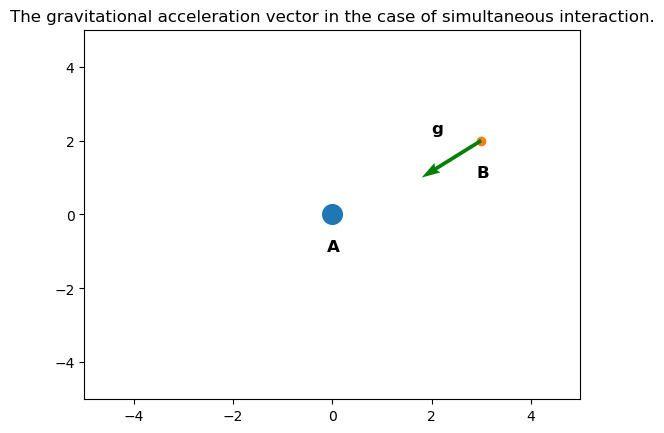

In [49]:
bodyA = np.array([0,0])
bodyB = np.array([3,2])
plt.scatter(bodyA[0],bodyA[1],s=200)
plt.scatter(bodyB[0],bodyB[1])
plt.quiver(bodyB[0], bodyB[1], -2.4, -2, angles = "xy", scale_units = "xy", scale = 2, color = 'green')
plt.text(bodyA[0]-0.1, bodyA[1]-1, 'A', fontsize=12, fontweight='bold')
plt.text(bodyB[0]-0.1, bodyA[1] +1, 'B', fontsize=12, fontweight='bold')
plt.text(bodyB[0] - 1, bodyA[1] + 2.2, 'g', fontsize=12, fontweight='bold')
plt.title('The gravitational acceleration vector in the case of simultaneous interaction.')
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.show()

In the upper graph, body A exerts a gravitational force of attraction on body B, whose vector is directed from the center of body B towards the center of body A in the current position of body A.

In [14]:
circleA = Body(0, 0, 40000, radius=10)
circleB = Body(200, 0, 200, radius=5, color=(250, 0, 0))
circleC = Body(0, -200, 6000, radius=5, color=(0, 0, 250))

# Set initial velocities
circleA.velocity = np.array([0, 0])
circleB.velocity = np.array([0.2, 0.5])

circleC.velocity = np.array([-1.5, 0])

# Set a list with objects
bodies = [circleA,circleB,circleC]
# bodies = [circleA, circleB]

interacting_bodies_number = len(bodies) - 1

In [15]:
animation(interacting_bodies_number, *bodies, simultaneous_interaction=True,trace_trajectories=False)

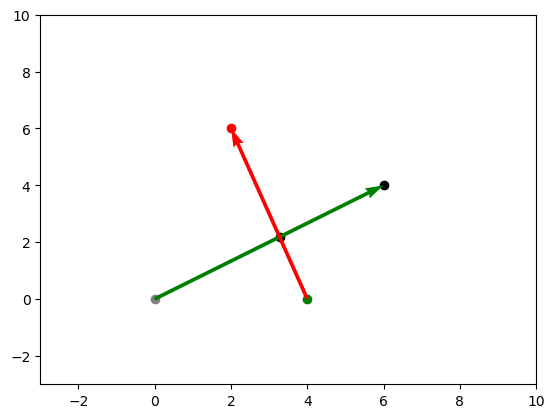

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
A = np.array([4,0])
B = np.array([2,6])
C = np.array([6,4])
D = np.array([0,0])

plt.xlim(-3,10)
plt.ylim(-3,10)
plt.scatter(D[0],D[1], color= 'grey')
plt.scatter(A[0],A[1],color='green')
plt.scatter(B[0], B[1], color='red')
plt.scatter(C[0],C[1],color = 'black')
# plt.scatter(3.2727, 1.1818,color = 'yellow')
plt.scatter( 3.272727272727273, 2.1818181818181817, color='black')
plt.quiver(0, 0, 6,4, angles = "xy", scale_units = "xy", scale = 1, color = 'green')
plt.quiver(A[0], A[1],-2, 6, angles = "xy", scale_units = "xy", scale = 1, color = 'red')
# plt.quiver(0,0,C[0], C[1], angles = "xy", scale_units = "xy", scale = 1, color = 'blue')

plt.show()

In [5]:
A = list(A)
B= list(B)
C = list(C)
D = list(D)
print(A,B,C,D)

pos_slope = (B[1] - A[1])/(B[0] - A[0])
pos_const = A[1] - pos_slope * A[0]

signal_slope = (C[1] - D[1])/(C[0] - D[0])
signal_const = D[1] - signal_slope * D[0]

x_intersept = (signal_const - pos_const)/(pos_slope - signal_slope)
y_intersept = pos_slope * x_intersept + pos_const
print(f'X = {x_intersept} Y = {y_intersept}')
a1,b1,c1 = pos_slope, A[1], pos_const 
a2,b2,c2 =  signal_slope, B[1], signal_const

S = np.array([[a1, b1], [a2, b2]])
b = np.array([-c1, -c2])

print(pos_slope)
print(pos_const)
print(np.linalg.solve(S,b))
print(B[1] == pos_slope * B[0] + pos_const)

[4, 0] [2, 6] [6, 4] [0, 0]
X = 3.272727272727273 Y = 2.1818181818181817
-3.0
12.0
[ 4.         -0.44444444]
True


In [105]:


naklon = 0.03125
angle_radians = math.atan(naklon)
angle_degrees = math.degrees(angle_radians)
angle_radians = math.atan(naklon)

print("Ъгълът в радиани: ", angle_radians)
print("Ъгълът в градуси: ", angle_degrees)
print(math.sin(naklon))
print(math.cos(naklon))

Ъгълът в радиани:  0.031239833430268277
Ъгълът в градуси:  1.7899106082460694
0.03124491398532608
0.9995117584851364
